In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
%matplotlib inline

# Polynomial Curve Fitting

Polynomial curve fitting is used to demonstrate regression problems. Particularly to make preditions where of value $\hat{t}$ for some new value $\hat{x}$.

$$y(x,w) = w_0 + w_1 x + w_2x^2 + ... + w_Mx^M = \sum_{j=0}^Mw_jx^j$$

Where $M$ is the order of the polynomial, and $x^j$ denotes $x$ raised to the power of $j$. The polynomial coefficients are denoted by vecotr $w$.

From training data, coefficients are determined by minimizing and error function. An example would be:

$$E(w) = \frac{1}{2}\sum_{n=1}^N\{y(x_n,w)-t_n\}^2$$

For example, we will use the function $sin(2{\pi}x)$ with 100 overvations in the range[0,1].

In [2]:
# Random Seed
np.random.seed(42)
# Evenly spaced array
x = np.linspace(0,1,100)
# Mock data
y = np.sin(2*np.pi*x)
# Noise with gaussian distribution
noise = np.random.normal(0,0.3,100)
x_random = np.random.choice(x,100)
y_new = np.sin(2*np.pi*x_random)+noise

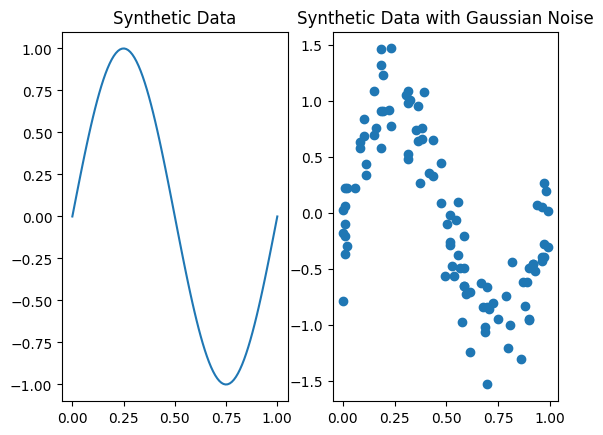

In [3]:
fig, ax = plt.subplots(1,2)
ax[0].plot(x,y)
ax[0].title.set_text('Synthetic Data')
ax[1].scatter(x_random,y_new)
ax[1].title.set_text('Synthetic Data with Gaussian Noise')

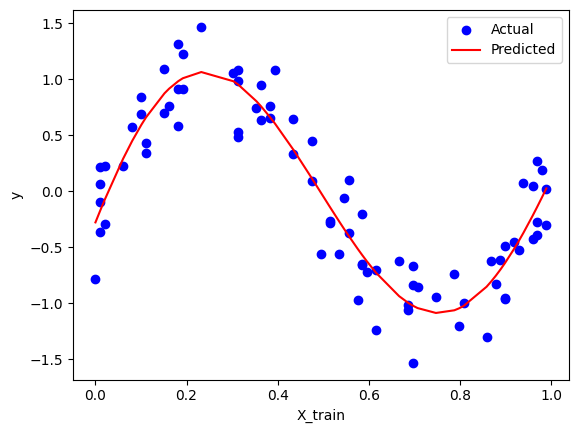

In [127]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(x_random, y_new, test_size=0.20,random_state=42)
degrees = [0,1,3,9]

# for n in degrees:
poly = PolynomialFeatures(degree=6)

# Transform X_train using polynomial features
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the transformed training data
y_train_pred = model.predict(X_train_poly)

# Plot the original training data
plt.scatter(X_train, y_train, color='blue', label='Actual')

# Sort X_train and y_train_pred based on X_train for a smoother plot
sorted_indices = X_train.argsort()
X_train_sorted = X_train[sorted_indices]
y_train_pred_sorted = y_train_pred[sorted_indices]

# Plot the predicted values
plt.plot(X_train_sorted, y_train_pred_sorted, color='red', label='Predicted')

# Add labels and a legend
plt.xlabel('X_train')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

array([[1.        , 0.6969697 , 0.5959596 , ..., 0.01234568, 0.01683502,
        0.02295684]])